##I. 데이터 파악

###0. 준비

In [ ]:
# 경고(warning) 비표시

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# student
# 구글 드라이브에 데이터 파일 업로드
# 구글 드라이브와 연동하여 드라이브 내의 파일 가져오기

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. 데이터 확인


**데이터 정보**

1) use_log.csv
- 2018년 4월 - 2019년 3월까지의 1년간 센터 이용 이력
- 회원이 센터를 이용하면 이용일이 시스템에 자동 입력됨

2) customer_master.csv
- 이전에 탈퇴한 회원도 포함
- 2019년 3월 말 시점의 회윈 데이터

3) class_master.csv
- 회원 구분 데이터(종일, 주간, 야간)

4) campaign_master.csv
- 가입 시 행사 종류 데이터(입회비 유무 등)

In [ ]:
uselog = '/content/drive/MyDrive/3장/use_log.csv' #구글드라이브의 파일경로로 파일 불러오기
import pandas as pd
uselog = pd.read_csv(uselog)
print(len(uselog)) #데이터 개수 파악하기
uselog.head() #각 데이터의 처음 5행 확인

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


**위에서 파악한 정보 정리**

1) use_log.csv
- 고객 ID, 이용일을 포함한 간단한 데이터
- 어떤 고객이 언제 센터를 이용했는지 알 수 있음
- 197428건으로 세로로 긴 데이터

In [ ]:
# student
customer = '/content/drive/MyDrive/3장/customer_master.csv'
customer = pd.read_csv(customer)
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


**위에서 파악한 정보 정리**

2) customer_master.csv
- 고객 ID, 이름, 회원 클래스, 성별, 등록일 정보
- is_deleted 열은 2019년 3워 시점에 탈퇴한 유저를 시스템에서 빨리 찾기 위한 칼럼
- customeer_id로 uselog.csv와 customer_master.csv를 연결시킬 수 있음

In [ ]:
# student
class_master = '/content/drive/MyDrive/3장/class_master.csv'
class_master = pd.read_csv(class_master)
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


**위에서 파악한 정보 정리**

3) class_master.csv
- class를 이용하면 회원 데이터인 customer_master.csv와 합칠 수 있음

In [ ]:
campaign_master = '/content/drive/MyDrive/3장/campaign_master.csv'
campaign_master = pd.read_csv(campaign_master)
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


**위에서 파악한 정보 정리**

4) campaign_master.csv
- campaign_id를 이용하면 회원 데이터인 customer_master.csv와 합칠 수 있음


### 2. 데이터 가공

In [ ]:
# student
# 회원 구분과 금액을 한번에 알 수 있게 데이터 가공하기
# customer에 회원 구분 class_master와 캠페인 구분 campaign_master를 결합하여 customer_join 생성하기

customer_join = pd.merge(customer, class_master, on="class", how="left") #고객 데이터를 중심으로 가로로 결합하는 레프트 조인
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [ ]:
# student
#조인 전후 데이터 개수 확인
print(len(customer)) #customer 데이터 개수
print(len(customer_join)) #customer_join 데이터 개수

4192
4192


In [ ]:
# student
#조인할 때 키가 없거나 조인이 잘못되면 자동으로 결측치가 들어감. 조인 후에는 결측치 확인 필수
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

**위에서 파악한 정보 정리**

1) end_date 외에는 결측치가 0으로, 데이터가 정확하게 조인된 것을 확인할 수 있음

2) end_date에 결측이 있는 이유 추측해보기

탈퇴하지 않은 회원의 탈퇴일이 공백일 것이기 때문이다. 

### 3. 데이터 집계

우선 캠페인 구분과 성별, 이미 탈퇴를 했는지 안 했는지(is_deleted 열)를 집계해서 전체 숫자를 파악하기

In [ ]:
customer_join.groupby("class_name").count()["customer_id"]

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [ ]:
# student
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [ ]:
# student
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [ ]:
# student
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

**위에서 파악한 정보 정리**
- 회원 클래스는 종일반이 거의 절반을 차지하고 야간 다음 주간 순
- 캠페인은 일반 입회가 많고, 입회 캠페인에 의한 가입이 약 20%
- 남녀 비율: 남자쪽이 약간 많음
- 2019년 3월 가입된 회원은 2842명, 탈퇴한 유저는 1350명

In [ ]:
#start_date가 2018년 4월 1일 이후부터 2019년 3월 31일까지인 가입 인원 시험 삼아 집계 해보기
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"]) #start_date를 datetime형으로 변환
customer_start = customer_join.loc[customer_join["start_date"]>pd.to_datetime("20180401")] #customer_start 변수에 해당 유저의 데이터 저장하고 개수 세기
print(len(customer_start))

1361


**위에서 파악한 정보 정리**

- 이 기간의 가입인원이 1361명

*추가로 궁금한 것이 있다면, 더 살펴보세요!*

### 4. 최근 고객데이터 집계

In [ ]:
 #추출한 데이터가 제대로 추출됐는지 확인하기 위해 end_date 유니크 개수 확인
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"]>=pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

**위에서 파악한 정보 정리**

데이터는 2953건, NaT는 datetime형의 결측치, 여기서는 탈퇴하지 않은 고객

In [ ]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [ ]:
# student
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [ ]:
# student
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

**위에서 파악한 정보 정리**

- 3.데이터 집계에서 전체를 집계했을 때와 회원 구분 및 성별의 비율이 크게 다르지 않음.
- 캠페인 구분은 약간 차이가 있음(전체 집계시 일반으로 입회한 유저 72%, 일반 입회 회원 비율 81%) 즉 입회 캠페인은 회원 비율 변화에 영향을 미침

###5. 이용이력 데이터 집계

**이용이력 데이터로 알 수 있는 것 생각해보기**

- 시간적인 요소 분석 가능(예: 한 달 이용 횟수의 변화, 회원의 정기적/비정기적 이용)

In [ ]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m") #1행과 2행에서 201804와 같은 형식으로 연월 칼럼의 데이터 작성
uselog_months = uselog.groupby(["연월","customer_id"],as_index=False).count() #연월과 고객 id 별로 groupby 집계
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"] #log_id를 카운트하면 되므로, usedate는 삭제. 필요 없음. 
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


**위에서 파악한 정보 정리**

예를 들어, 고객 as002855는 2018년 4월에 4번 이용했음

In [ ]:
# student
# 고객별로 평균값, 중앙값, 최댓값, 최솟값 집계
uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min" ])["count"] #groupby로 평균값, 중앙값, 최댓값, 최솟값 집계
uselog_customer = uselog_customer.reset_index(drop=False) #groupby의 영향으로 customer_id가 index에 들어 있기 때문에 이것을 칼럼으로 변경
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


###6. 이용이력 데이터로 정기이용 여부 플래그 작성

- 정기적으로 센터를 이용하는 고객 특정해 보기

- 즉, 매주 같은 요일에 왔는지 아닌지로 판단해보려고 함.

- 월별 정기적 이용 여부는 고객에 따라 다르겠지만, 여기서는 고객마다 월/요일 별로 집계하고, 최댓값이 4 이상인 요일이 하나라도 있는 회원은 플래그를 1로 처리

In [ ]:
# 고객마다 월/요일별로 집계하기

uselog["weekday"] = uselog["usedate"].dt.weekday #요일을 숫자로 변환(0에서 6까지가 월-일요일)
uselog_weekday = uselog.groupby(["customer_id","연월","weekday"], 
                                as_index=False).count()[["customer_id","연월", "weekday","log_id"]] #고객, 연월, 요일별로 log_id 세기
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


**위에서 파악한 정보 정리**

예를 들어, 고객 as002855는 2018년 4월 weekday 5(토요일)에 4번, 2018년 5월에도 토요일에 4번 스포츠 센터 방문 -> 매주 토요일을 체육관 오는 날로 생각하는 것 같음

In [ ]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id", "count"]] #고객 단위로 집계하고 최댓값 구하기. 즉, 특정 월, 특정 요일에 가장 많이 이용한 횟수. 이 횟수가 4 또는 5인 사람은 적어도 어떤 달의 매주 특정 요일에 정기적으로 방문한 고객임. 
uselog_weekday["routine_flg"] = 0 #routine_flg에 0을 입력
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"]<4, 1) #횟수가 4 미만인 경우 원래 값인 0을 그대로 두고, 4 이상인 경우에만 1 대입하게 하기
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


**위에서 파악한 정보 정리**

count가 4 이상인 고객은 플래그에 1이 들어감. 

###7. 고객 데이터와 이용이력데이터 결합

5.& 6. 에서 작성한 uselog_customer, uselog_weekday를 customer_join과 결합하기

In [ ]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left") #결합에 사용한 조인키는 customer_id, 레프트 조인
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left") #결합할 데이터를 uselog_weekday의 customer_id와 routine_flg로 한정
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [ ]:
customer_join.isnull().sum() #결측치 확인

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

**위에서 파악한 정보 정리**

- end_date 이외에는 결측치가 없음 -> 결합에 문제 없음

- 이용 이력도 추가되어 고객 분석이 가능해졌음. 

###8. 회원기간 계산

이용 이력인 시각적인 변화 데이터를 추가했기 때문에 분석을 시작하기 전에 회원 기간 칼럼을 하나 더 추가하기

- 회원 기간 = start_date - end_date

- 다만 2019년 3월까지 탈퇴하지 않은 회원은 end_date에 결측치가 들어 있기 때문에 그 차이를 계산할 수 없음

- 그래서 탈퇴하지 않은 회원은 2019년 4월 30일로 채워서 회원 기간 계산

- 2019년 3월 31일로 계산할 경우, 실제로 2019년 3월 31일에 탈퇴한 사람(2월 말까지 탈퇴 신청을 한 사람)과 구별할 수 없음. 

In [ ]:
from dateutil.relativedelta import relativedelta #날짜 비교 함수 relativedelta를 사용하기 위한 라이브러리 임포트
customer_join["calc_date"] = customer_join["end_date"] #날짜 계산용 칼럼을 end_date 기준으로 작성
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430")) # 결측치에 2019년 4월 30일 대입
customer_join["membership_period"] = 0
for i in range(len(customer_join)): #계산
    delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


###9. 고객행동의 각종통계량 파악

In [ ]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


**칼럼 설명**

- 칼럼 이름 mean: 고객의 매월 평균 이용 횟수
- 행에 있는 mean: 고객의 매월 평균 이용 횟수의 평균
- 표시된 값은 한 사람당 매월 평균 이용 횟수
- 평균값, 중앙값에 큰 차이가 없으며, 고객 1명당 이용 횟수는 약 5번 정도


In [ ]:
customer_join.groupby("routine_flg").count()["customer_id"]

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

**파악한 정보 정리**

0이 779고, 1이 3413으로, 정기적으로 이용하는 회원의 수가 많다. 

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

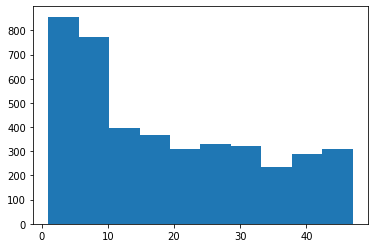

In [ ]:
# student
#회원기간의 분포 살펴보기

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"]) #hist를 이용하여 히스토그램 작성

**위에서 파악한 정보 정리**

- 회원 기간이 10개월 이내인 고객이 많고, 10개월 이상의 고객 수는 거의 일정함
- 짧은 기간에 고객이 빠져나감. 

###10. 탈퇴회원과 지속회원의 차이 파악

- 3에서 파악한 탈퇴 회원 1350명, 지속회원 2840명

- 탈퇴 회원과 지속 회원을 나눠서 describe로 비교하기

In [ ]:
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


**위에서 파악할 수 있는 정보 정리**
- 탈퇴 회원의 매월 이용 횟수의 평균값, 중앙값, 최댓값, 최솟값이 모두 지속 회원보다 작음
- 특히 평균값과 중앙값은 1.5배 정도 차이 남
- 매월 최대 이용 횟수의 평균값은 지속 회원이 높긴 하지만, 탈퇴 회원도 6.4 정도
- routine_flg의 평균값은 차이가 크게 나서 지속 회원은 0.98로 많은 회원이 저기적으로 이용하고 있음
- 탈퇴 회원은 0.45로 거의 절반은 랜덤하게 이용하고 있음

In [ ]:
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [ ]:
# 지금까지 사용한 customer_join을 csv로 출력해 두기

customer_join.to_csv("customer_join.csv", index=False)

##II. 클러스터링

###0.준비

In [ ]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###1. 데이터 확인

**데이터 정보**

1) use_log.csv
- 2018년 4월 - 2019년 3월까지의 1년간 센터 이용 이력

2) customer_master.csv
- 이전에 탈퇴한 회원도 포함
- 2019년 3월 말 시점의 회윈 데이터

3) class_master.csv
- 회원 구분 데이터(종일, 주간, 야간)

4) campaign_master.csv
- 가입 시 행사 종류 데이터(입회비 유무 등)

5) customer_join.csv
- 앞에서 작성한 이용 이력을 포함한 고객 데이터

In [ ]:
# 먼저 use_log.csv와 customer_join.csv만 읽어 들이고, customer_join.csv를 변수 customer에 저장하기, 결측치 상황도 확인. 

import pandas as pd
uselog = '/content/drive/MyDrive/3장/use_log.csv'
uselog = pd.read_csv(uselog)
uselog.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [ ]:
customer = '/content/drive/MyDrive/3장/customer_join.csv'
customer = pd.read_csv(customer)
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

###2. 클러스터링으로 회원 그룹화

In [ ]:
# student
#이용 이력을 이용하여 그룹화, 따라서 이용하는 변수는 고객의 한 달 이용 이력 데이터인 mean, median, max, min, membership_period
#필요한 변수 추출

customer_clustering = customer[["mean", "median","max", "min", "membership_period"]]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


**위에서 파악할 수 있는 정보 정리**

membership_period의 최댓값이 47로, 앞의 데이터의 최댓값과 차이가 많이 남.

이 경우, membership_period에 의해 결과가 좌지우지 되기 때문에 표준화 필요

In [ ]:
# student
#클러스터링 진행
#K-means: 변수 간의 거리를 기반으로 그룹화

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler #표준화를 위한 임포트
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering) #3행, 4행: 표준화 실행

kmeans = KMeans(n_clusters=4, random_state=0) #그룹화하고자 하는 수를 4개로 미리 지정
clusters = kmeans.fit(customer_clustering_sc) #모델 구축
customer_clustering["cluster"] = clusters.labels_
print(customer_clustering["cluster"].unique())
customer_clustering.head()

[1 2 3 0]


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1


###3. 클러스터링 결과 분석

In [ ]:
# student
#칼럼 이름을 알기 쉽게 바꾸기

customer_clustering.columns = ["월평균값","월중앙값", "월최댓값", "월최솟값","회원기간", "cluster"] #칼럼 이름 변경
customer_clustering.groupby("cluster").count() #클러스터마다 집계

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,840,840,840,840,840
1,1249,1249,1249,1249,1249
2,771,771,771,771,771
3,1332,1332,1332,1332,1332


In [ ]:
# student
#그룹마다 특징을 파악하기 위해 평균값 계산하기

customer_clustering.groupby("cluster").mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,8.061942,8.047024,10.014286,6.175000,7.019048
1,4.677561,4.670937,7.233787,2.153723,36.915933
2,3.065504,2.900130,4.783398,1.649805,9.276265
3,5.539535,5.391141,8.756006,2.702703,14.867868


**위에서 파악한 정보 정리**

각 그룹 별 특징 정리하기

###34. 클러스터링 결과 가시화

- 클러스터링에 사용한 변수 5개를 2차원으로 그리기 위해 차원 축소
- 차원 축소: 비지도학습의 일종, 정보를 되도록 잃지 않게 하면서 새로운 축 만듦
- 5개의 변수를 2개의 변수로 표현하여 그래프 그릴 수 있음
- 차원 축소의 대표적인 방법인 주성분 분석 사용

In [ ]:
from sklearn.decomposition import PCA #주성분 분석 라이브러리
X = customer_clustering_sc 
pca = PCA(n_components=2) #모델 생성
pca.fit(X) #4,5행: 주성분 분석 실행
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_clustering["cluster"] #2차원으로 축소한 데이터를 pca_df에 저장하고, 위에서 작성한 클러스터링 결과도 저장

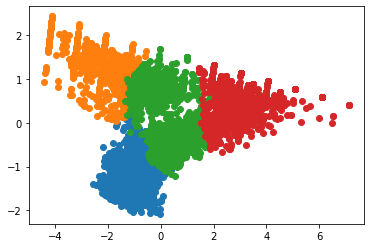

In [ ]:
# student
import matplotlib.pyplot as plt #시각화 라이브러리
%matplotlib inline
for i in customer_clustering["cluster"].unique(): #그룹마다 색깔 다르게
    tmp = pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp[0], tmp[1])

###5. 클러스터링 결과로 탈퇴회원 경향 파악

In [ ]:
 customer_clustering = pd.concat([customer_clustering, customer], axis=1) # customer_clustering에 customer 결합
customer_clustering.groupby(["cluster","is_deleted"],as_index=False).count()[["cluster","is_deleted","customer_id"]] #cluster, is_deleted 별로 customer_id 개수 집계

,cluster,is_deleted,customer_id
0,0,0,821
1,0,1,19
2,1,0,1231
3,1,1,18
4,2,1,771
5,3,0,790
6,3,1,542


**위에서 파악한 정보 정리**

- 그룹0과 1은 지속 회원이 많음
- 그룹2는 탈퇴회원만 있음
- 그룹3은 지속 회원이 약간 많음


In [ ]:
customer_clustering.groupby(["cluster","routine_flg"],as_index=False).count()[["cluster","routine_flg","customer_id"]] #정기적으로 스포츠 센터를 이용하는지 여부 플래그 작성

,cluster,routine_flg,customer_id
0,0,0,52
1,0,1,788
2,1,0,2
3,1,1,1247
4,2,0,499
5,2,1,272
6,3,0,226
7,3,1,1106


**(1) 분석 결과에 대한 해석**

**(2) 활용방안**